In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PRE

[[0.1943 0.1985 0.203  0.2151 0.4806]
 [0.2488 0.2501 0.2527 0.26   0.3186]
 [0.052  0.0601 0.078  0.1079 0.2069]
 [0.1953 0.2032 0.2155 0.2393 0.3207]
 [0.2253 0.2662 0.3223 0.3661 0.4813]
 [0.1413 0.142  0.141  0.1389 0.1489]
 [0.2597 0.2615 0.2657 0.4229 0.3774]
 [0.6573 0.652  0.645  0.6374 0.612 ]
 [0.031  0.0414 0.0541 0.0806 0.1337]]


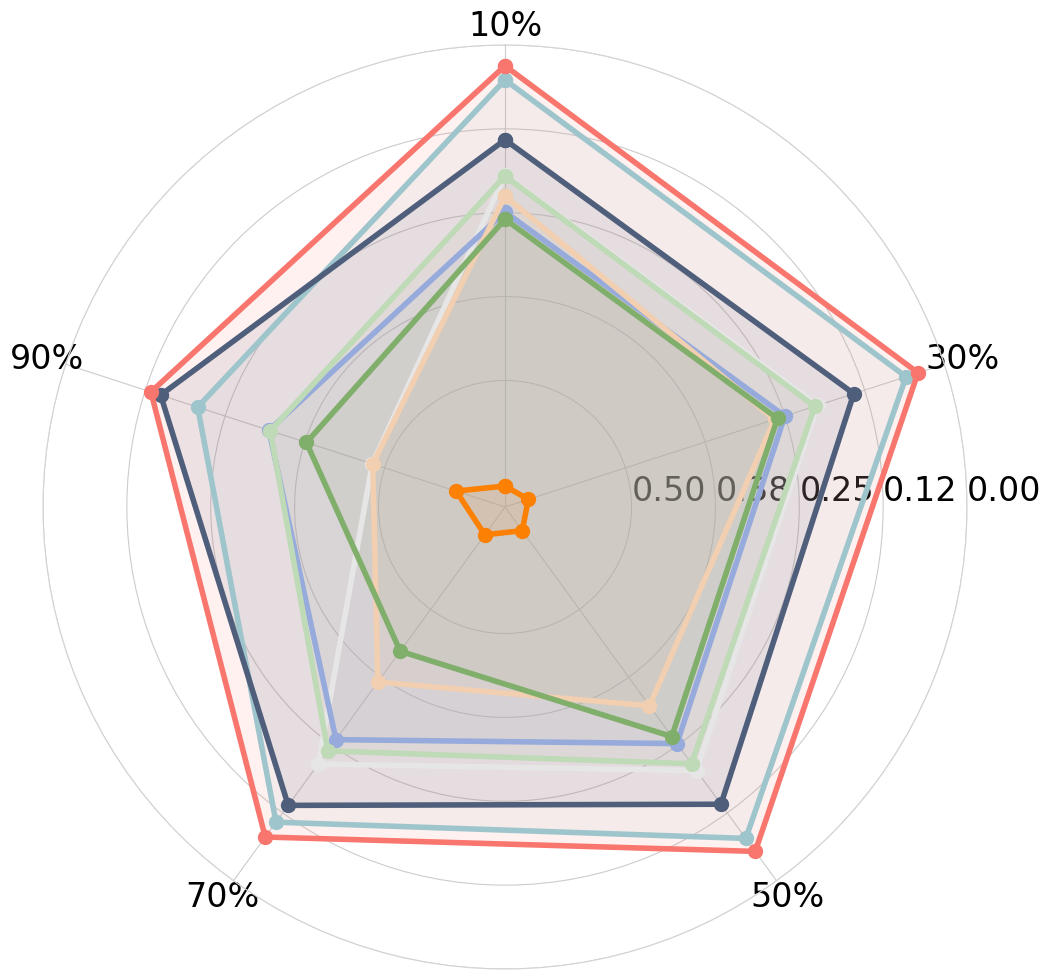

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import requests
sns.set_style("white")

methods = ["Our", "DINEOF", "CSDI",  "ImputeFormer", "Inpainter", "Lin-ITP", "MAE", "Slide Window", "TRMF"]
methods = methods[::-1]
metrics = ["10%", "30%", "50%", "70%", "90%"]
value = np.array([
                  [0.0310, 0.0414, 0.0541, 0.0806, 0.1337],
                  [0.6573, 0.6520, 0.6450, 0.6374, 0.6120],
                  [0.2597, 0.2615, 0.2657, 0.4229, 0.3774],
                  [0.1413, 0.1420, 0.1410, 0.1389, 0.1489],
                  [0.2253, 0.2662, 0.3223, 0.3661, 0.4813],
                  [0.1953, 0.2032, 0.2155, 0.2393, 0.3207],
                  [0.0520, 0.0601, 0.0780, 0.1079, 0.2069],
                  [0.2488, 0.2501, 0.2527, 0.2600, 0.3186],
                  [0.1943, 0.1985, 0.2030, 0.2151, 0.4806]])
value = value[::-1]
print(value)

# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"][::-1]
    # color_palette = sns.color_palette()[:8]
    

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.5, 0, 5), np.linspace(0.5, 0, 5).tolist(), color="black", size=24)
    plt.xticks(theta[:-1], metrics, color="black", size=24)
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig
  

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

[[4 4 4 4 7]
 [7 6 6 6 4]
 [2 2 2 2 3]
 [5 5 5 5 5]
 [6 8 8 7 8]
 [3 3 3 3 2]
 [8 7 7 8 6]
 [9 9 9 9 9]
 [1 1 1 1 1]]


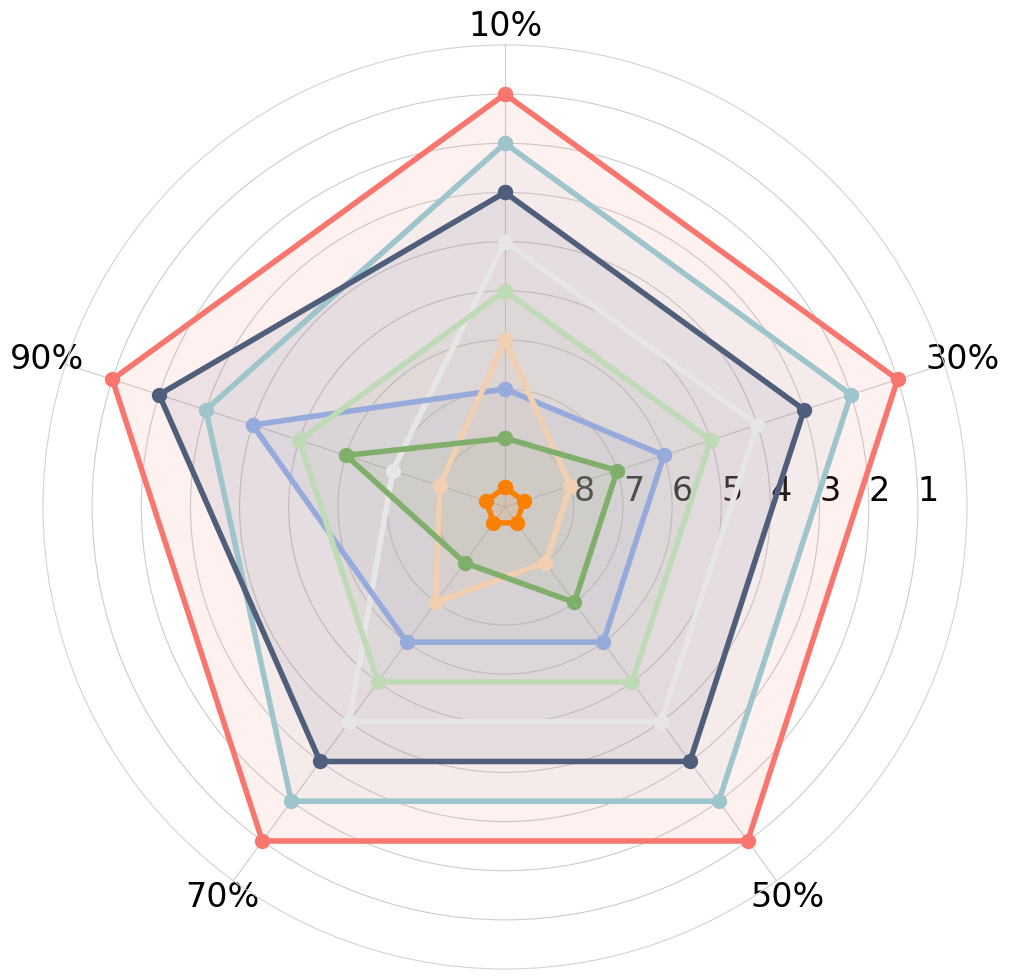

In [4]:
from matplotlib.ticker import MaxNLocator
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"][::-1]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(8, 1, 8), np.linspace(8, 1, 8).tolist(), color="black", size=24)
    plt.xticks(theta[:-1], metrics, color="black", size=24)
    ax.yaxis.set_inverted(True)
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
rankings = np.argsort(np.argsort(value, 0),0)+1
print(rankings)
fig = plot_radar_chart(rankings, methods, title="", metrics=metrics)
plt.show()

[[0.0696 0.0727 0.0763 0.0863 0.3879]
 [0.0979 0.0993 0.1019 0.1091 0.1704]
 [0.0076 0.0104 0.017  0.0291 0.0753]
 [0.0798 0.086  0.0956 0.1142 0.1843]
 [0.079  0.1081 0.1542 0.1978 0.3269]
 [0.0407 0.0414 0.0405 0.0399 0.0473]
 [0.1134 0.1159 0.1206 0.2778 0.2838]
 [0.5763 0.565  0.5496 0.5328 0.4803]
 [0.0029 0.0051 0.0091 0.0174 0.0376]]


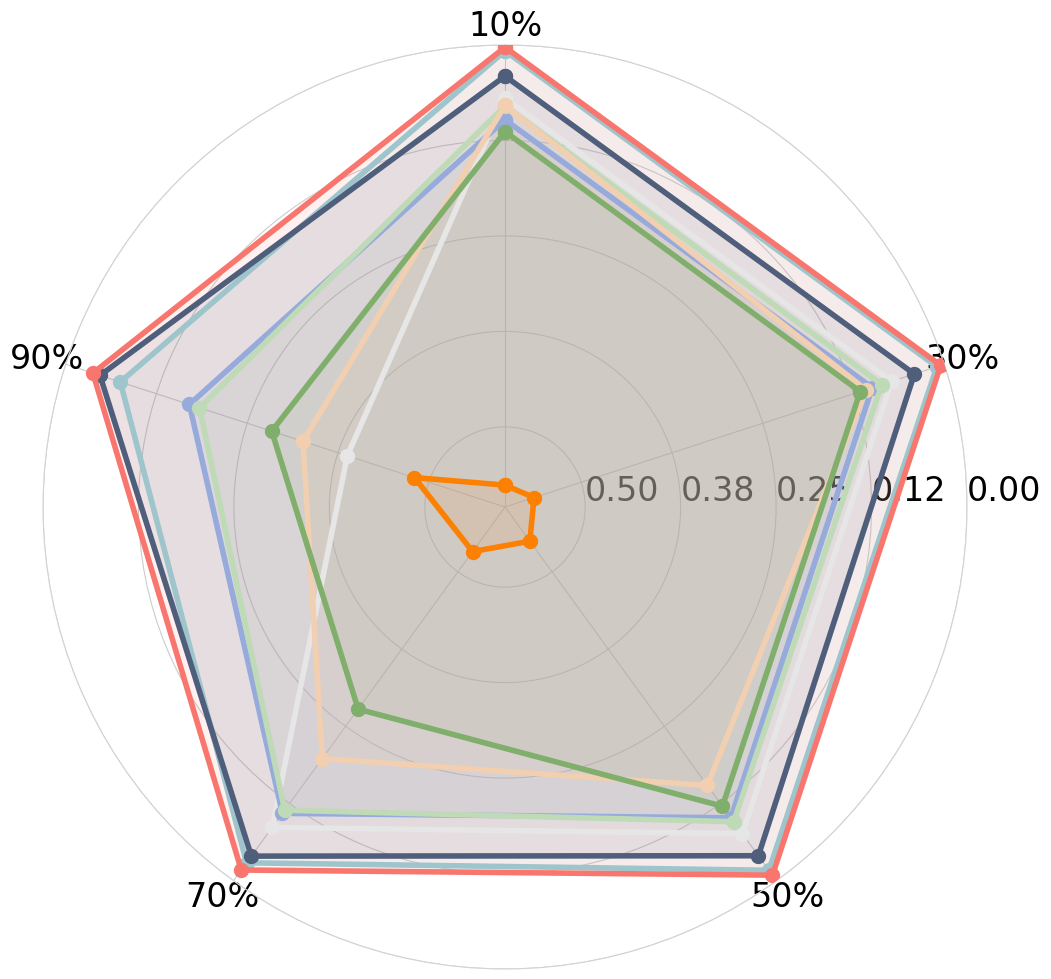

In [5]:
#MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import requests
sns.set_style("white")

methods = ["Our", "DINEOF", "CSDI",  "ImputeFormer", "Inpainter", "Lin-ITP", "MAE", "Slide Window", "TRMF"]
methods = methods[::-1]
metrics = ["10%", "30%", "50%", "70%", "90%"]
value = np.array([
                  [0.0029, 0.0051, 0.0091, 0.0174, 0.0376],
                  [0.5763, 0.5650, 0.5496, 0.5328, 0.4803],
                  [0.1134, 0.1159, 0.1206, 0.2778, 0.2838],
                  [0.0407, 0.0414, 0.0405, 0.0399, 0.0473],
                  [0.0790, 0.1081, 0.1542, 0.1978, 0.3269],
                  [0.0798, 0.0860, 0.0956, 0.1142, 0.1843],
                  [0.0076, 0.0104, 0.0170, 0.0291, 0.0753],
                  [0.0979, 0.0993, 0.1019, 0.1091, 0.1704],
                  [0.0696, 0.0727, 0.0763, 0.0863, 0.3879]])
value = value[::-1]
print(value)


# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"][::-1]
    # color_palette = sns.color_palette()[:8]
    

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.5, 0, 5), np.linspace(0.5, 0, 5).tolist(), color="black", size=24)
    plt.xticks(theta[:-1], metrics, color="black", size=24)
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig
  

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

MEXICO

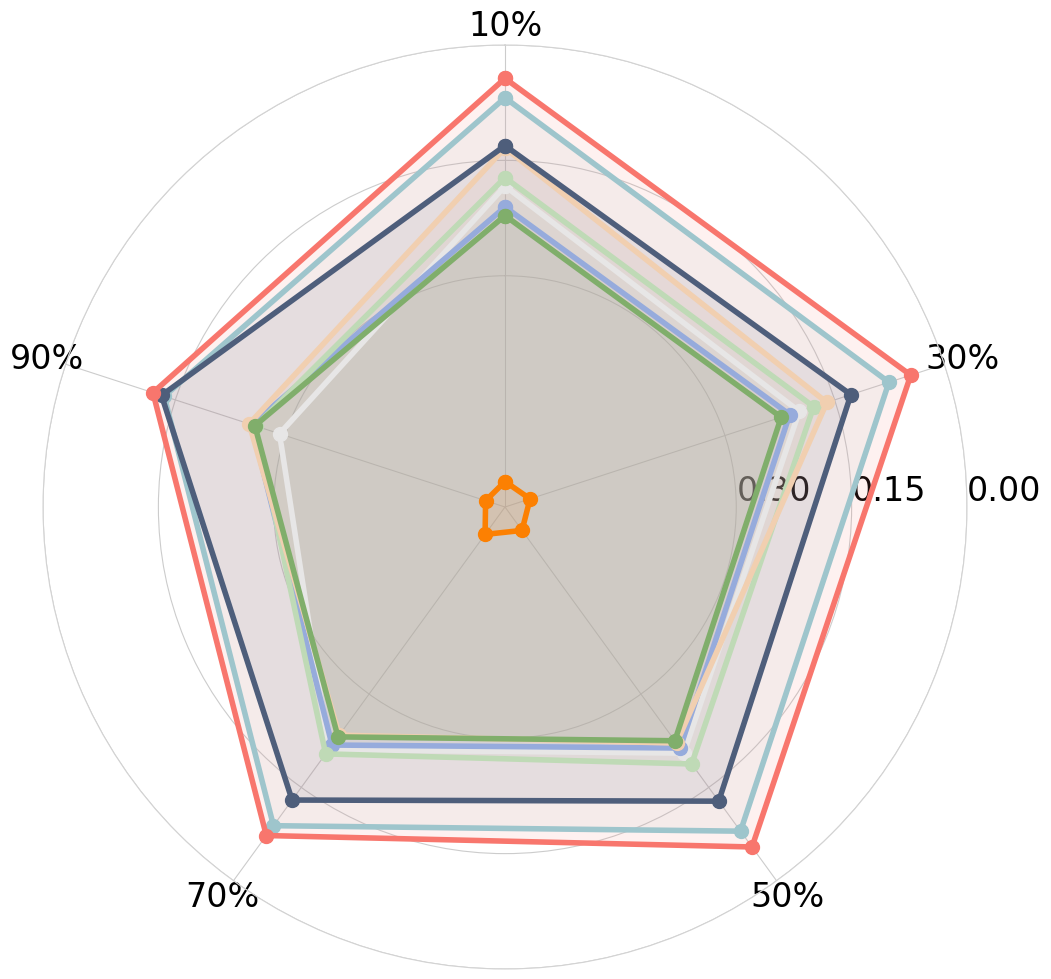

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.ticker as mtick

methods = ["STImp", "DINEOF", "CSDI",  "ImputeFormer", "Inpainter", "Lin-ITP", "MAE", "Slide Window", "TRMF"]
methods = methods[::-1]
metrics = ["10%", "30%", "50%", "70%", "90%"]
value = np.array([
                  [0.0434, 0.0460, 0.0543, 0.0727, 0.1194],
                  [0.5675, 0.5664, 0.5630, 0.5566, 0.5741],
                  [0.2218, 0.2231, 0.2250, 0.2312, 0.2587],
                  [0.1308, 0.1278, 0.1279, 0.1297, 0.1311],
                  [0.1338, 0.1607, 0.2213, 0.2340, 0.2509],
                  [0.1724, 0.1787, 0.1877, 0.2039, 0.2598],
                  [0.0686, 0.0758, 0.0797, 0.0885, 0.1348],
                  [0.2106, 0.2115, 0.2133, 0.2181, 0.2541],
                  [0.1834, 0.1984, 0.2051, 0.2105, 0.2924]])

value = value[::-1]


# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"][::-1]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.3, 0, 3), np.linspace(0.3, 0, 3).tolist(), color="black", size=24)
    plt.xticks(theta[:-1], metrics, color="black", size=24)
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

[[6 6 5 5 8]
 [7 7 6 6 5]
 [2 2 2 2 3]
 [5 5 4 4 7]
 [4 4 7 8 4]
 [3 3 3 3 2]
 [8 8 8 7 6]
 [9 9 9 9 9]
 [1 1 1 1 1]]


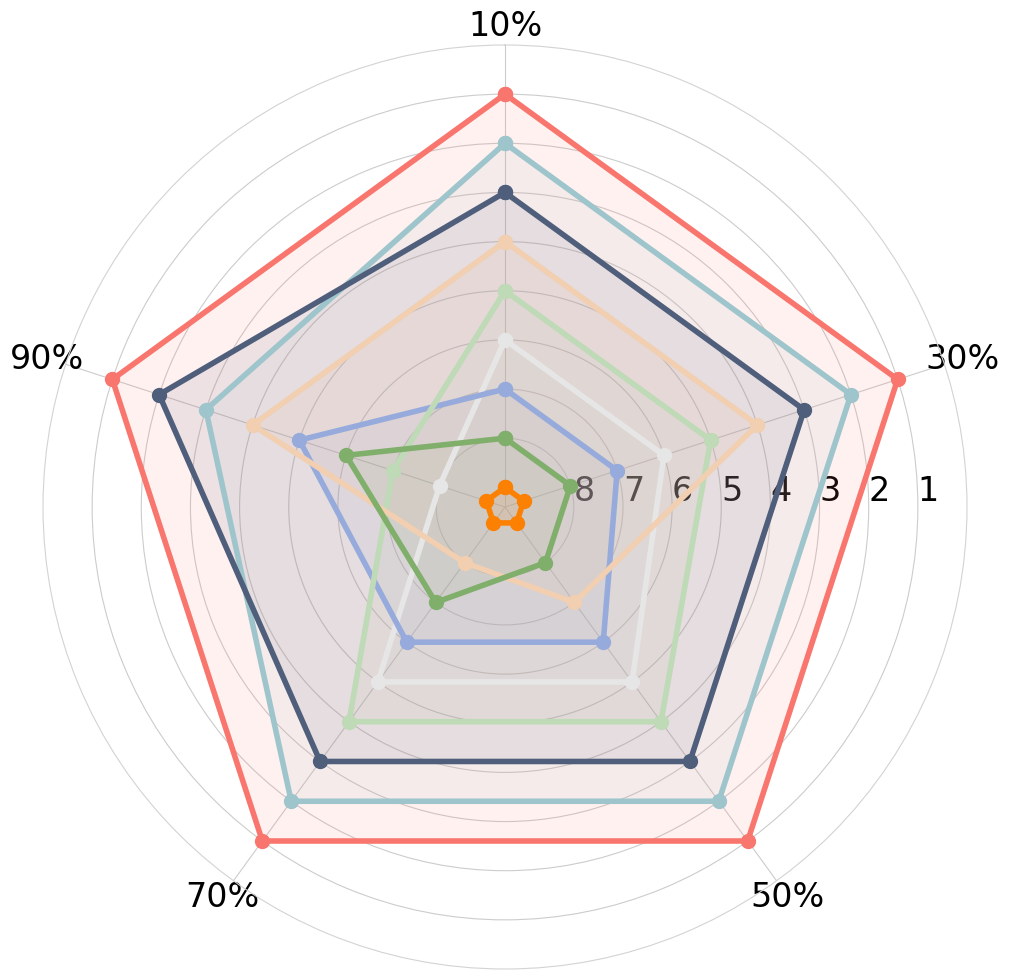

In [9]:
from matplotlib.ticker import MaxNLocator
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"][::-1]
    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(8, 1, 8), np.linspace(8, 1, 8).tolist(), color="black", size=24)
    plt.xticks(theta[:-1], metrics, color="black", size=24)
    ax.yaxis.set_inverted(True)
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
rankings = np.argsort(np.argsort(value, 0),0)+1
print(rankings)
fig = plot_radar_chart(rankings, methods, title="", metrics=metrics)
plt.show()

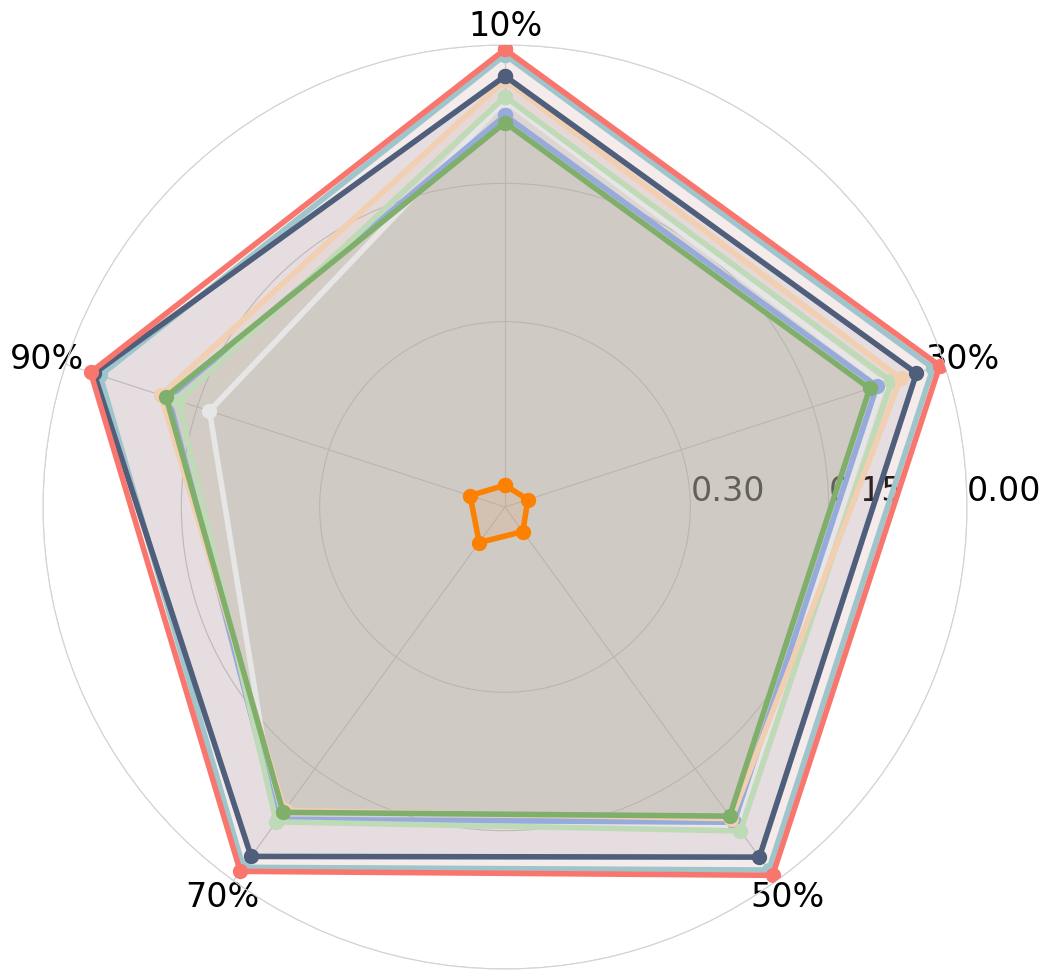

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.ticker as mtick

methods = ["STImp", "DINEOF", "CSDI",  "ImputeFormer", "Inpainter", "Lin-ITP", "MAE", "Slide Window", "TRMF"]
methods = methods[::-1]
metrics = ["10%", "30%", "50%", "70%", "90%"]
value = np.array([
                  [0.0048, 0.0053, 0.0073, 0.0126, 0.0285],
                  [0.4773, 0.4749, 0.4680, 0.4533, 0.4611],
                  [0.0841, 0.0851, 0.0866, 0.0917, 0.1144],
                  [0.0337, 0.0319, 0.0317, 0.0326, 0.0324],
                  [0.0381, 0.0498, 0.0832, 0.0942, 0.1086],
                  [0.0561, 0.0604, 0.0668, 0.0790, 0.1286],
                  [0.0108, 0.0130, 0.0144, 0.0180, 0.0394],
                  [0.0764, 0.0770, 0.0784, 0.0823, 0.1175],
                  [0.0602, 0.0695, 0.0744, 0.0790, 0.1640]])

value = value[::-1]


# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"][::-1]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.3, 0, 3), np.linspace(0.3, 0, 3).tolist(), color="black", size=24)
    plt.xticks(theta[:-1], metrics, color="black", size=24)
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

Chesapeake

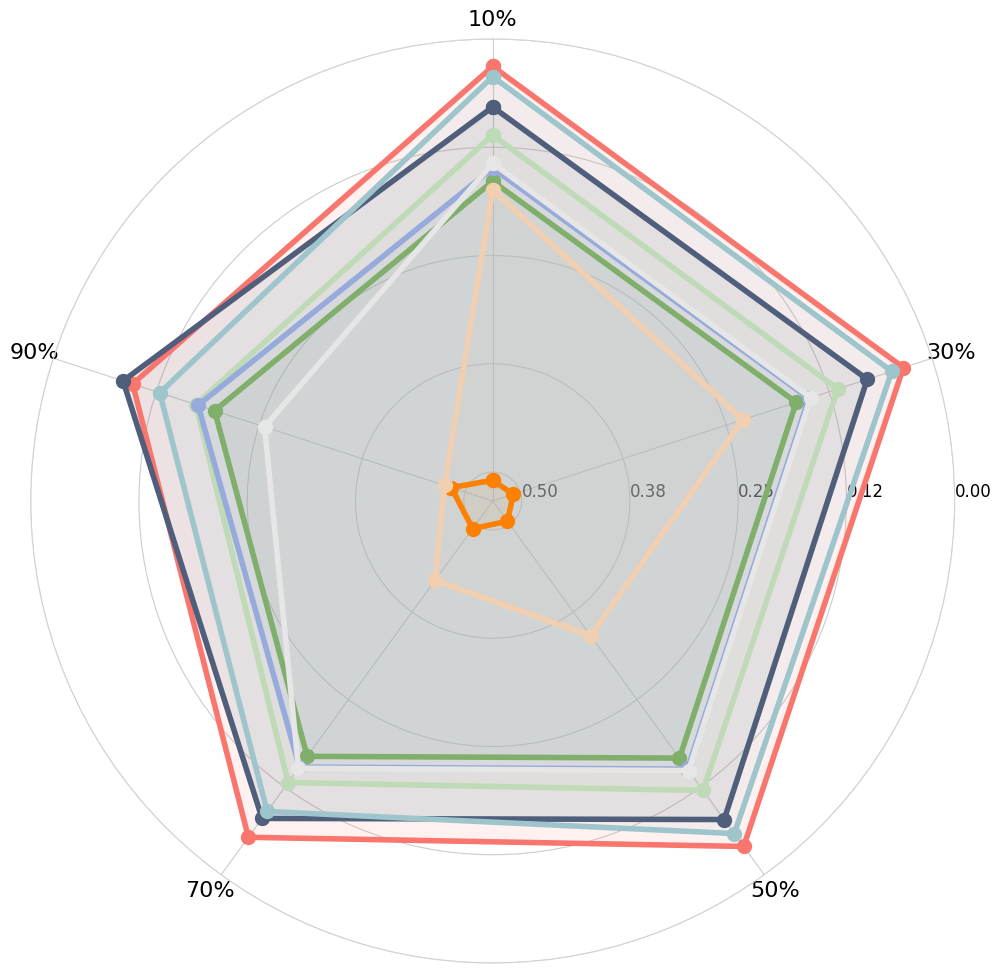

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.ticker as mtick

metrics = ["10%", "30%", "50%", "70%", "90%"]
value = np.array([
                  [0.0316, 0.0348, 0.0404, 0.0535, 0.0963],
                  [0.5095, 0.5084, 0.5045, 0.4939, 0.4832],
                  [0.1643, 0.1649, 0.1665, 0.1690, 0.1958],
                  [0.0785, 0.0787, 0.0788, 0.0804, 0.0847],
                  [0.1740, 0.2297, 0.3410, 0.4201, 0.4749],
                  [0.1109, 0.1145, 0.1203, 0.1316, 0.1730],
                  [0.0435, 0.0489, 0.0588, 0.0903, 0.1292],
                  [0.1490, 0.1497, 0.1508, 0.1537, 0.1757],
                  [0.1434, 0.1473, 0.1487, 0.1519, 0.2564]])


# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.5, 0, 5), np.linspace(0.5, 0, 5).tolist(), color="black", size=12)
    plt.xticks(theta[:-1], metrics, color="black", size=16)
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

[[1 1 1 1 2]
 [9 9 9 9 9]
 [7 7 7 7 6]
 [3 3 3 2 1]
 [8 8 8 8 8]
 [4 4 4 4 4]
 [2 2 2 3 3]
 [6 6 6 6 5]
 [5 5 5 5 7]]


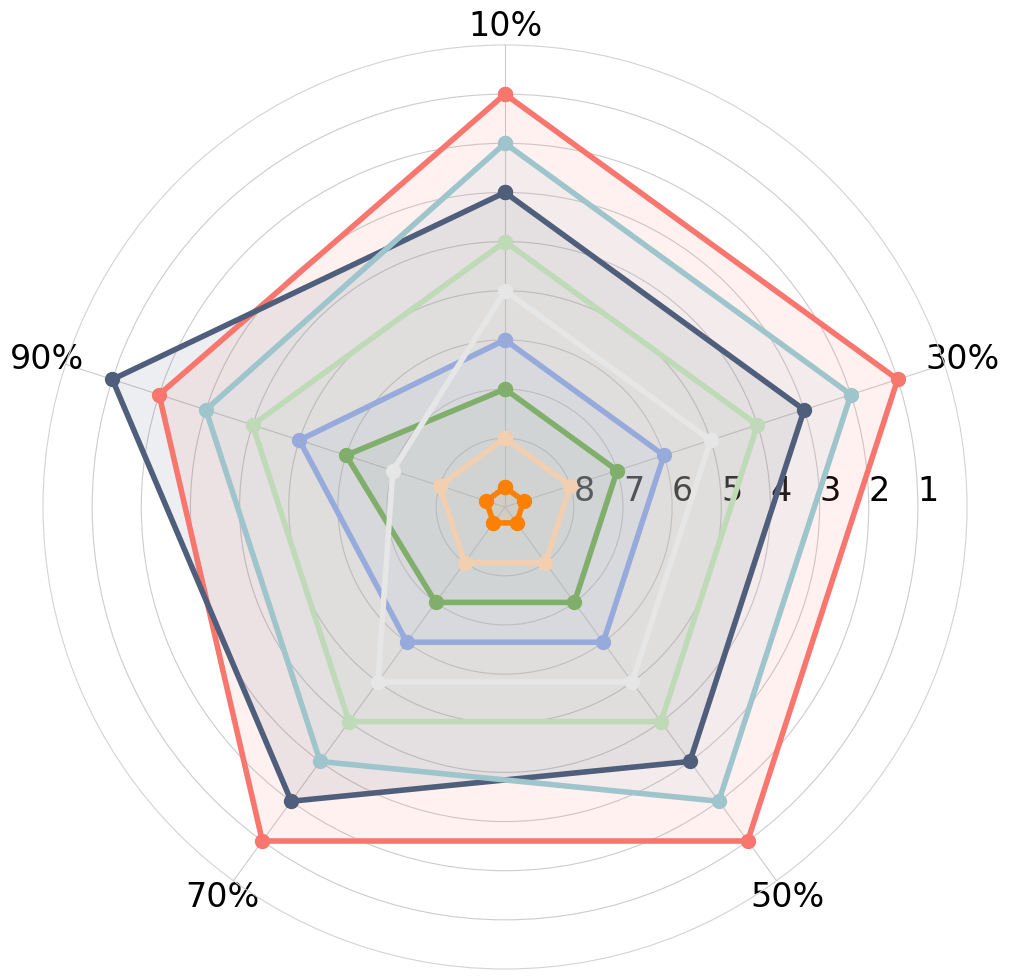

In [12]:
from matplotlib.ticker import MaxNLocator
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(8, 1, 8), np.linspace(8, 1, 8).tolist(), color="black", size=24)
    plt.xticks(theta[:-1], metrics, color="black", size=24)
    ax.yaxis.set_inverted(True)
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
rankings = np.argsort(np.argsort(value, 0),0)+1
print(rankings)
fig = plot_radar_chart(rankings, methods, title="", metrics=metrics)
plt.show()

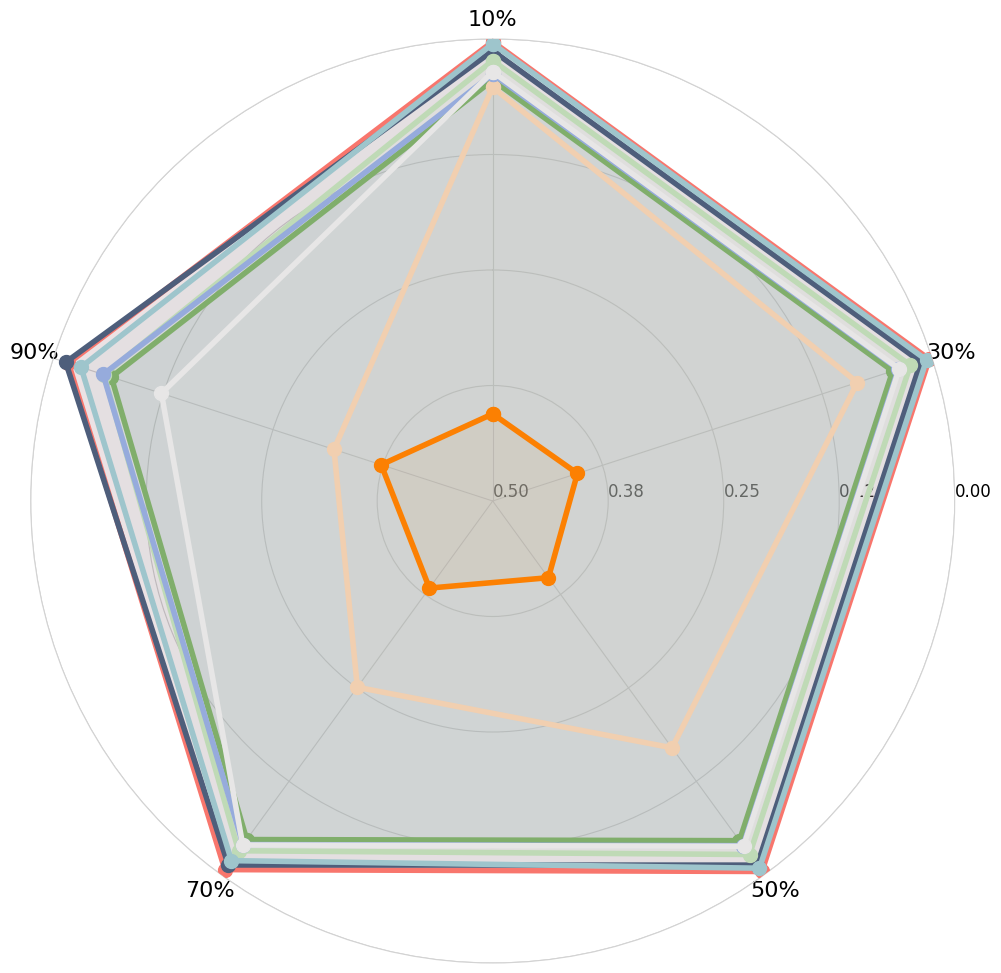

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.ticker as mtick

metrics = ["10%", "30%", "50%", "70%", "90%"]
value = np.array([
                  [0.0029, 0.0033, 0.0044, 0.0069, 0.0172],
                  [0.4057, 0.4036, 0.3974, 0.3835, 0.3731],
                  [0.0445, 0.0448, 0.0456, 0.0471, 0.0660],
                  [0.0127, 0.0128, 0.0129, 0.0131, 0.0141],
                  [0.0521, 0.0850, 0.1698, 0.2508, 0.3194],
                  [0.0233, 0.0247, 0.0271, 0.0321, 0.0577],
                  [0.0051, 0.0063, 0.0088, 0.0189, 0.0315],
                  [0.0380, 0.0384, 0.0389, 0.0404, 0.0567],
                  [0.0355, 0.0374, 0.0381, 0.0398, 0.1230]])


# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.5, 0, 5), np.linspace(0.5, 0, 5).tolist(), color="black", size=12)
    plt.xticks(theta[:-1], metrics, color="black", size=16)
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

Yangtze

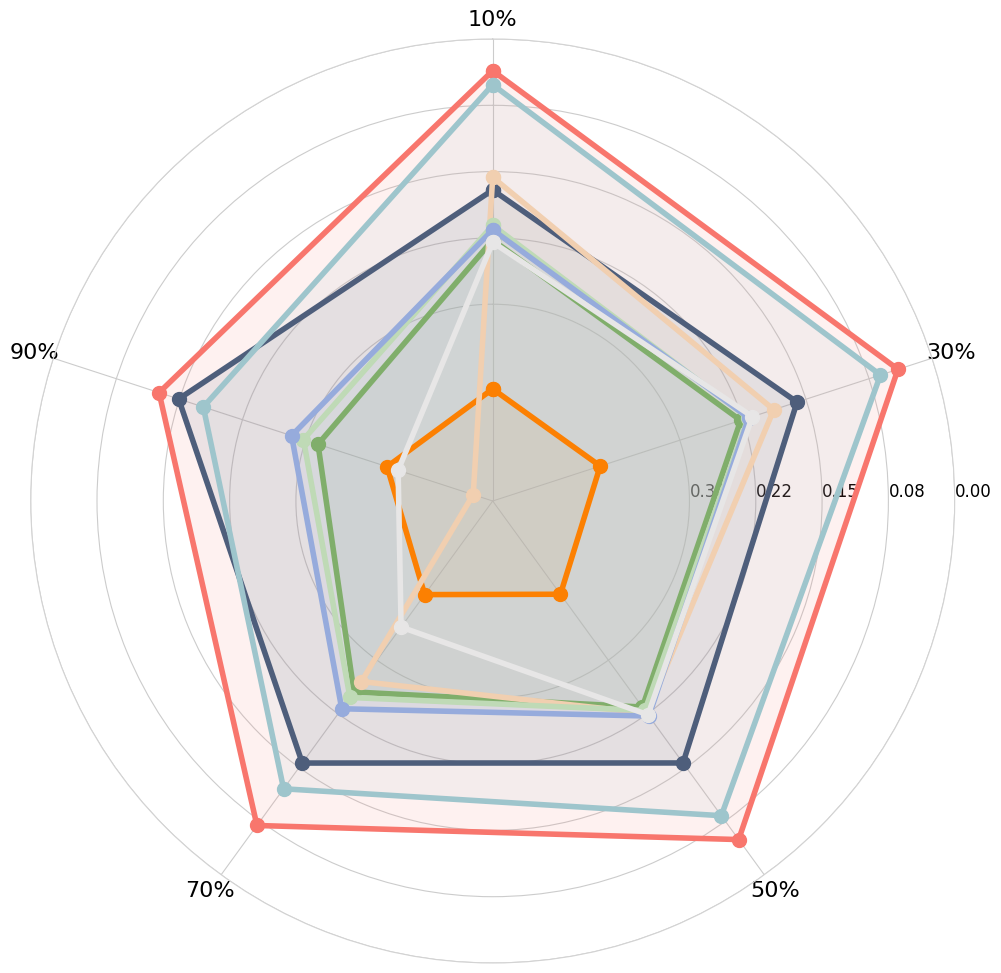

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.ticker as mtick

value = np.array([
                  [0.0359, 0.0406, 0.0492, 0.0689, 0.1258],
                  [0.3958, 0.3947, 0.3922, 0.3917, 0.3970],
                  [0.2274, 0.2276, 0.2345, 0.2556, 0.3148],
                  [0.1708, 0.1606, 0.1563, 0.1562, 0.1491],
                  [0.1564, 0.1883, 0.2258, 0.2701, 0.4994],
                  [0.2108, 0.2187, 0.2297, 0.2479, 0.2975],
                  [0.0517, 0.0614, 0.0826, 0.1202, 0.1784],
                  [0.2159, 0.2180, 0.2219, 0.2321, 0.2834],
                  [0.2299, 0.2137, 0.2237, 0.3463, 0.4101]])


# Function[]
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.3, 0, 5), np.linspace(0.3, 0, 5).tolist(), color="black", size=12)
    plt.xticks(theta[:-1], metrics, color="black", size=16)
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

[[1 1 1 1 1]
 [9 9 9 9 7]
 [7 8 8 6 6]
 [4 3 3 3 2]
 [3 4 6 7 9]
 [5 7 7 5 5]
 [2 2 2 2 3]
 [6 6 4 4 4]
 [8 5 5 8 8]]


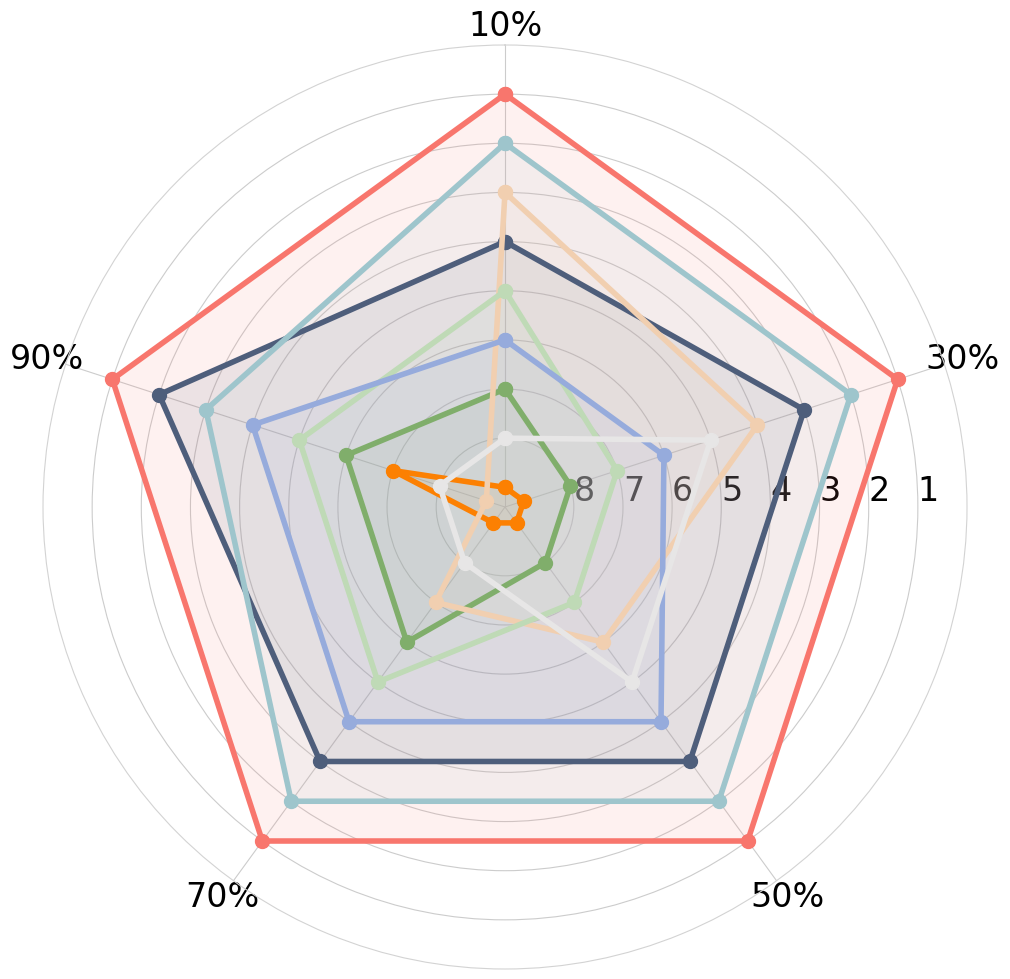

In [18]:
from matplotlib.ticker import MaxNLocator
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    # color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(8, 1, 8), np.linspace(8, 1, 8).tolist(), color="black", size=24)
    plt.xticks(theta[:-1], metrics, color="black", size=24)
    ax.yaxis.set_inverted(True)
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
rankings = np.argsort(np.argsort(value, 0),0)+1
print(rankings)
fig = plot_radar_chart(rankings, methods, title="", metrics=metrics)
plt.show()

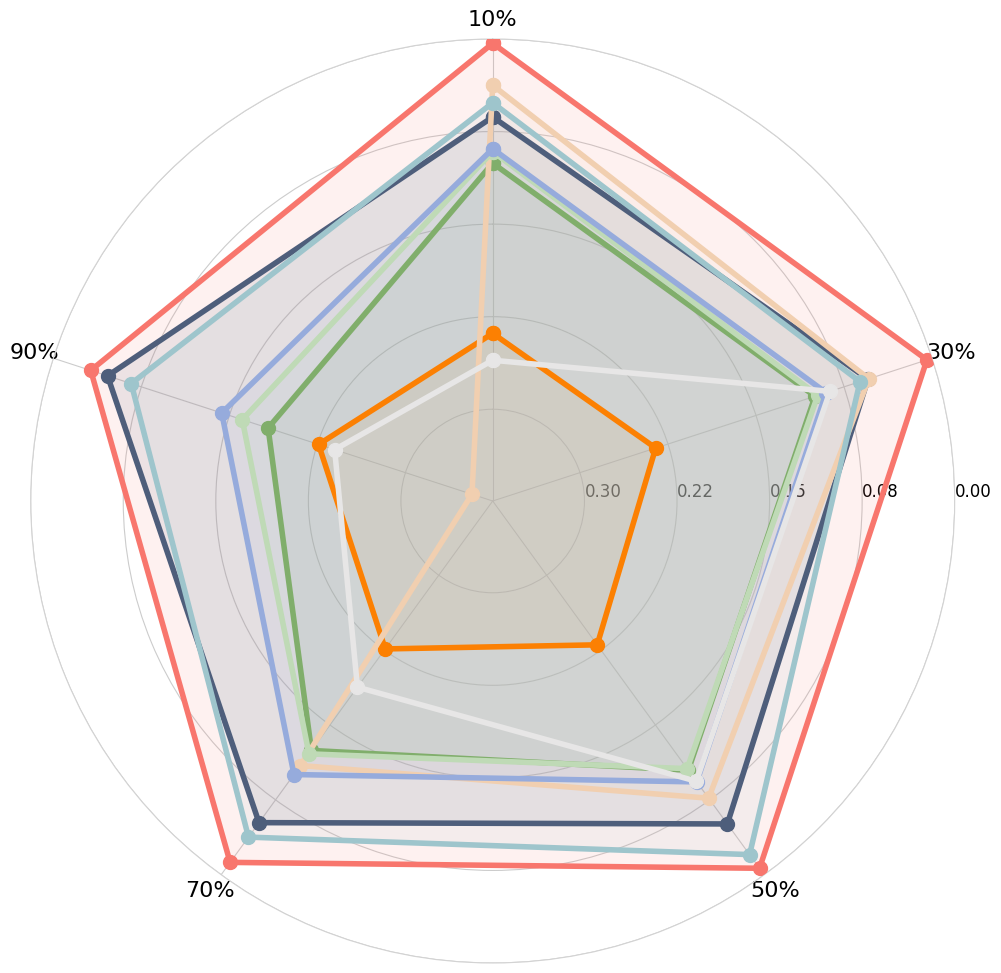

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.ticker as mtick

value = np.array([
                  [0.0035, 0.0044, 0.0065, 0.0124, 0.0319],
                  [0.2385, 0.2355, 0.2303, 0.2262, 0.2260],
                  [0.1006, 0.0997, 0.1047, 0.1245, 0.1830],
                  [0.0632, 0.0546, 0.0509, 0.0522, 0.0462],
                  [0.0375, 0.0539, 0.0767, 0.1094, 0.3567],
                  [0.0912, 0.0974, 0.1063, 0.1211, 0.1610],
                  [0.0517, 0.0614, 0.0202, 0.0377, 0.0664],
                  [0.0890, 0.0903, 0.0930, 0.1004, 0.1435],
                  [0.2603, 0.0870, 0.0937, 0.1879, 0.2397]])


# Function[]
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.3, 0, 5), np.linspace(0.3, 0, 5).tolist(), color="black", size=12)
    plt.xticks(theta[:-1], metrics, color="black", size=16)
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()